## Exercice #2 : calcule ta moyenne (au ralenti) !

On souhaite implémenter le calcul d'une moyenne pondérée d'une série de notes, chaque note ayant son propre coefficient.

Malheureusement on ne dispose pour faire ce calcul que de fonctions toutes pourries d'addition de deux nombres (`slow_add()` donnée ci-dessous), de multiplication de deux nombres (`slow_mul()` donnée ci-dessous) et de division de deux nombres (`slow_div()` donnée ci-dessous), chaucune de ces fonctions mettant une seconde à s'exécuter. 

Votre code ne devra donc pas utiliser d'opération comme `+`, `-`, `*`, `/` ou `sum()`, uniquement des appels aux fonction  `slow_add()`, `slow_mul()`, et `slow_div()` pour faire ce type d'opérations.

In [75]:
import dask
import time

def slow_add(a, b):
    time.sleep(1)
    return a+b

def slow_mul(a,b):
    time.sleep(1)
    return a*b

def slow_div(a, b):
    time.sleep(1)
    return a/b if b !=0 else None

coefs = [2, 1, 1, 3, 1, 2, 1, 3]
notes = [15, 10, 8, 11, 10, 5, 13, 10]


**Question 2.1**

En utilisant le principe de somme cumulée à l'aide de boucles, écrire le code permettant de faire le calcul de la moyenne des notes contenues dans la liste `notes` donnée ci-dessus, pondérées par les coefficients contenus dans la liste `coefs` ci-dessus, et afficher

In [64]:
%%time
sum_coef = 0
sum_ponderee = 0


for i in range(len(notes)):
    sum_ponderee = slow_add(sum_ponderee, slow_mul(notes[i], coef[i]))
    sum_coef = slow_add(sum_coef, coef[i])
print(slow_div(sum_ponderee, sum_coef))



10.285714285714286
CPU times: total: 25 s
Wall time: 25.1 s


In [67]:
%%time
slow_add_delayed = dask.delayed(slow_add)
slow_mul_delayed = dask.delayed(slow_mul)
slow_div_delayed = dask.delayed(slow_div)

sum_coef = dask.delayed(0)
sum_ponderee = dask.delayed(0)

for i in range(len(notes)):
    sum_ponderee = slow_add_delayed(sum_ponderee, slow_mul_delayed(notes[i], coef[i]))
    sum_coef = slow_add_delayed(sum_coef, coef[i])

res = slow_div_delayed(sum_ponderee, sum_coef)
print(res.compute())

10.285714285714286
CPU times: total: 14.2 s
Wall time: 14.2 s


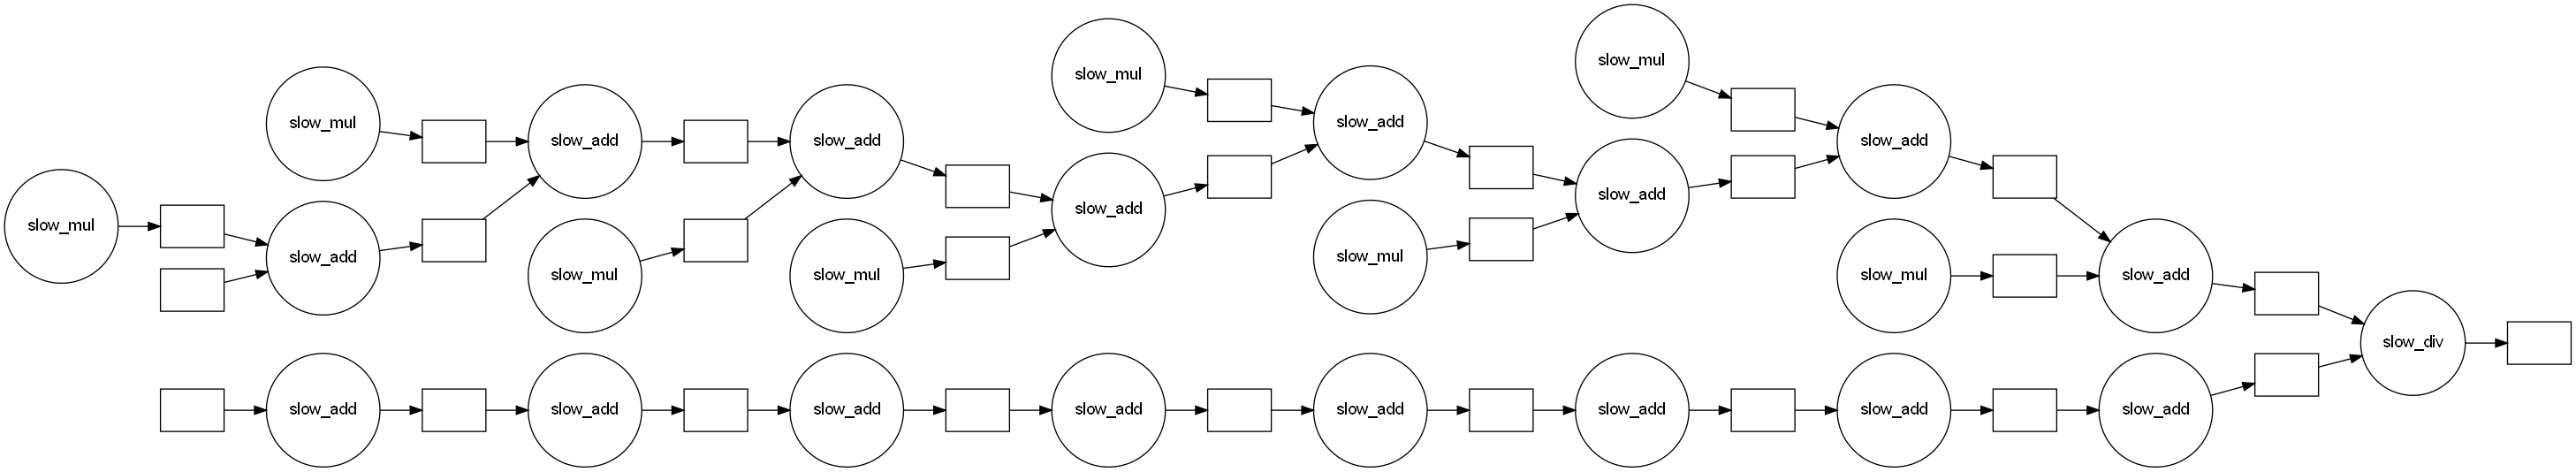

In [59]:
res.visualize(rankdir="LR")

In [56]:
def tree_sum_slow(liste) :
    while len(liste)> 1:
        new_liste = []
        for i in range(0,len(liste),2):
            new_liste.append(slow_add(liste[i], liste[i+1]))
        liste = new_liste
    return liste[0]

prods = []
for i in range(len(notes)):
    prods.append(slow_mul(notes[i], coef[i]))
print(len(prods))

sum_ponderee = tree_sum_slow(prods)

sum_coef = tree_sum_slow(coef)

res = slow_div(sum_ponderee, sum_coef)
print(res)

8
10.285714285714286


In [73]:
def tree_sum_slow_delayed(liste) :
    while len(liste)> 1:
        new_liste = []
        for i in range(0,len(liste),2):
            new_liste.append(slow_add_delayed(liste[i], liste[i+1]))
        liste = new_liste
    return liste[0]

prods = []
for i in range(len(notes)):
    prods.append(slow_mul_delayed(notes[i], coef[i]))
print(len(prods))

sum_ponderee = tree_sum_slow_delayed(prods)

sum_coef = tree_sum_slow_delayed(coef)

res = slow_div_delayed(sum_ponderee, sum_coef)
print(res.compute())


8
10.285714285714286


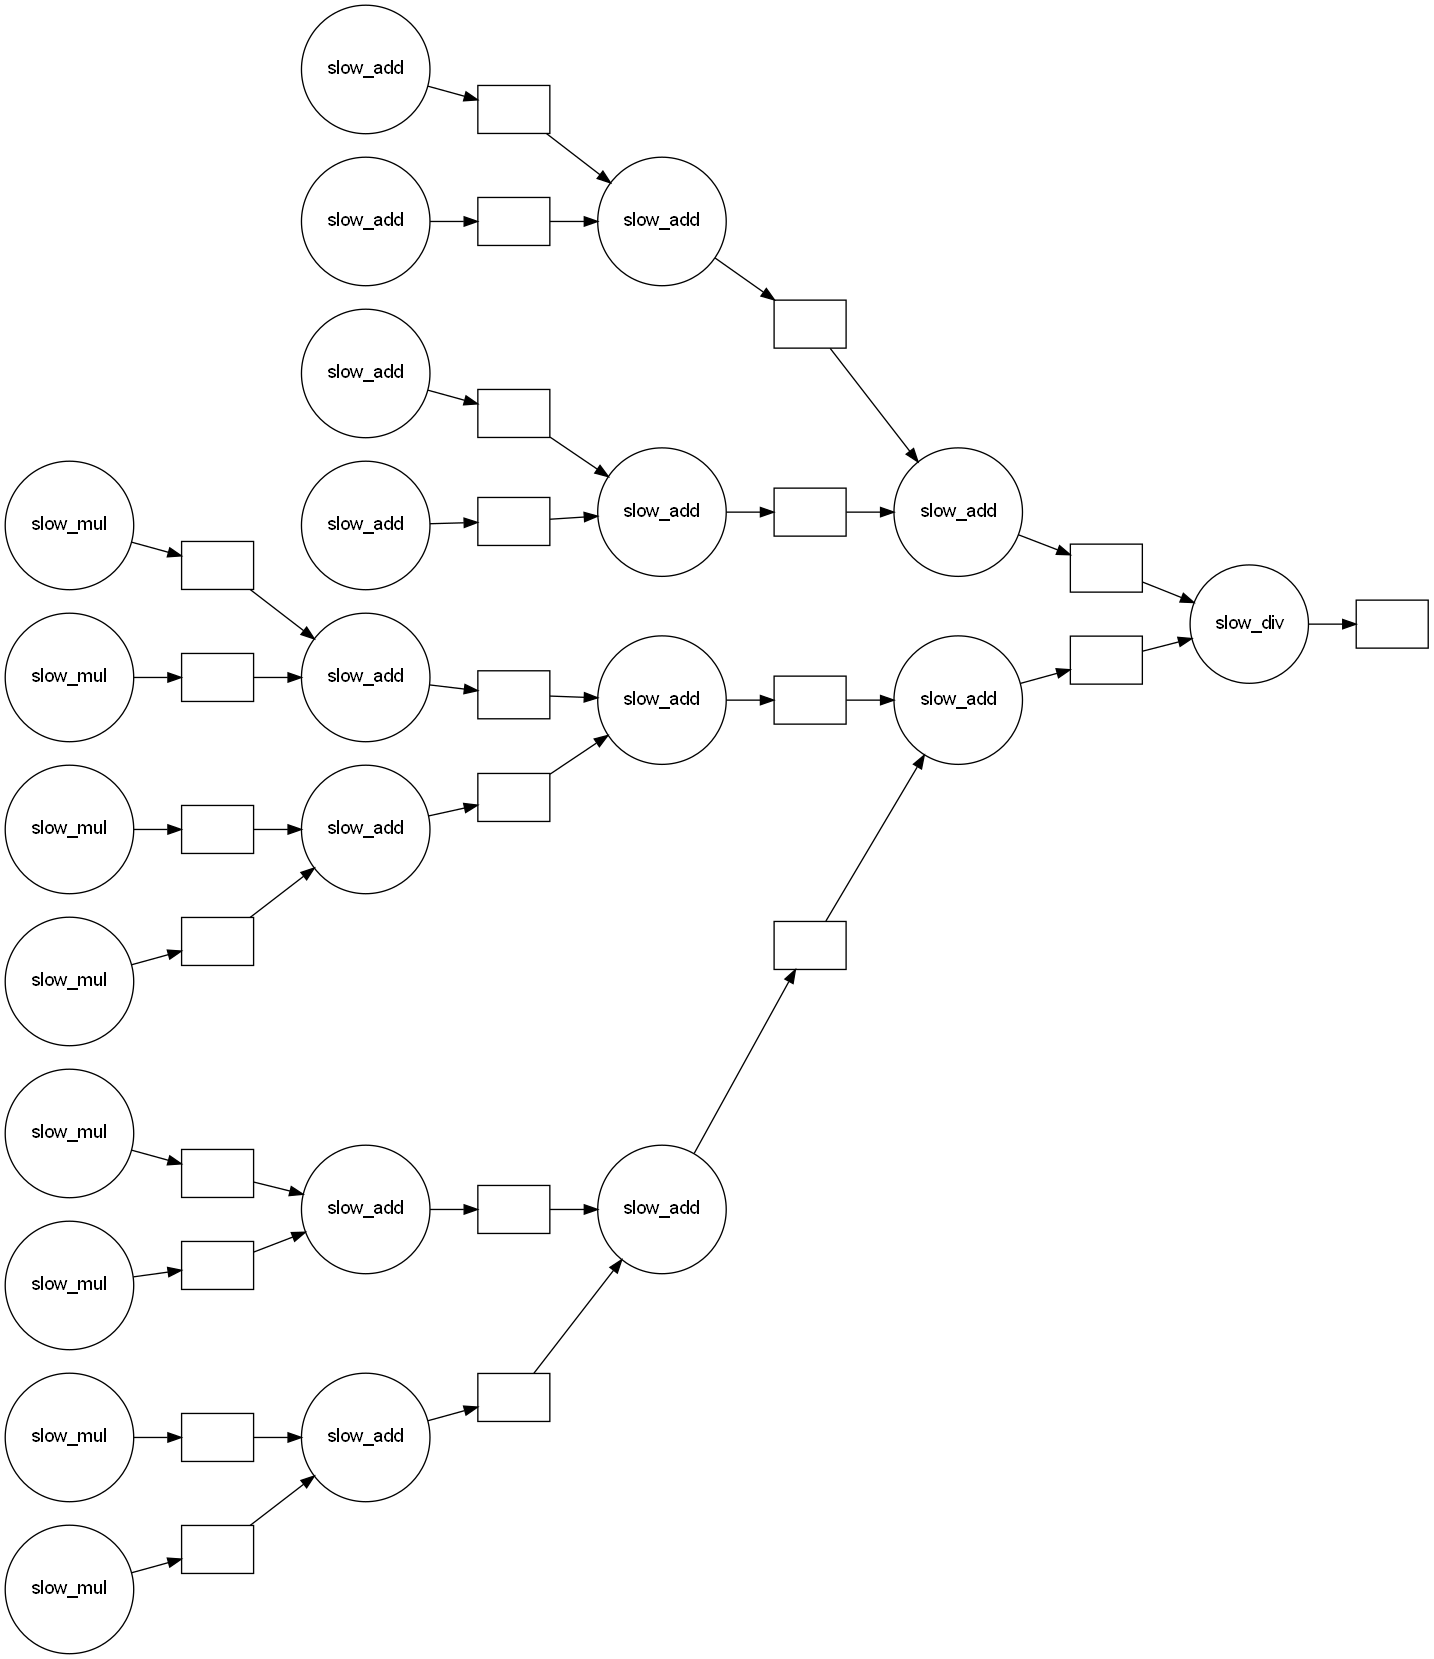

In [70]:
res.visualize(rankdir="LR")